In [62]:
#importing the dependencies
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans


In [63]:
# Data collection
customer_data = pd.read_csv(r'C:\Users\HP\Downloads\Snapdeal Project\Online Retail.csv')


In [64]:
# first 5 rows in the dataframe 
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [65]:
# finding the number of rows of columns 
customer_data . shape

(541909, 8)

In [66]:
# getting information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [67]:
#getting the description of the data set
customer_data.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [68]:
# checking whether is any missing value or not
customer_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [72]:
# lets fill the description
customer_data['Description'].fillna('Unknown', inplace=True)
print(customer_data.columns.tolist())



['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [73]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [74]:
# checking duplicates if present on specific columns only
duplicate_mask = df.duplicated(subset=['InvoiceNo'])
print(duplicate_mask)



0         False
1          True
2          True
3          True
4          True
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 541909, dtype: bool


In [75]:
# let see the duplicate rows only
duplicate_rows = df[duplicate_mask]
print(duplicate_rows)


       InvoiceNo StockCode                          Description  Quantity  \
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice         Country  
1        12/1/2010 8:2

In [76]:
#drop the duplicate rows
df_cleaned = df.drop_duplicates(subset=['InvoiceNo'], keep='first')
print (df_cleaned)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
21        536368     22960             JAM MAKING SET WITH JARS         6   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
...          ...       ...                                  ...       ...   
541865    581583     20725              LUNCH BAG RED RETROSPOT        40   
541867    581584     20832     RED FLOCK LOVE HEART PHOTO FRAME        72   
541869    581585     22481       BLACK TEA TOWEL CLASSIC DESIGN        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541894    581587     22631             CIRCUS PARADE LUNCH BOX         12   

            InvoiceDate  UnitPrice         Country  
0        12/1/2010 8:2

In [77]:
# let optimize the column  types 
customer_data = df_cleaned.convert_dtypes()
print(customer_data)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
7         536366     22633               HAND WARMER UNION JACK         6   
9         536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
21        536368     22960             JAM MAKING SET WITH JARS         6   
25        536369     21756             BATH BUILDING BLOCK WORD         3   
...          ...       ...                                  ...       ...   
541865    581583     20725              LUNCH BAG RED RETROSPOT        40   
541867    581584     20832     RED FLOCK LOVE HEART PHOTO FRAME        72   
541869    581585     22481       BLACK TEA TOWEL CLASSIC DESIGN        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541894    581587     22631             CIRCUS PARADE LUNCH BOX         12   

            InvoiceDate  UnitPrice         Country  
0        12/1/2010 8:2

In [78]:
# standarise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = customer_data.select_dtypes(include='number').columns
scaled_array = scaler.fit_transform(customer_data[numeric_cols])
df_std = pd.DataFrame(scaled_array, columns=numeric_cols)
print (df_std)

       Quantity  UnitPrice
0     -0.008077  -0.044565
1     -0.008077  -0.046178
2      0.018268  -0.046547
3     -0.008077  -0.040646
4     -0.011117  -0.036728
...         ...        ...
25895  0.026375  -0.047100
25896  0.058800  -0.048783
25897 -0.001997  -0.049543
25898 -0.006050  -0.043643
25899 -0.001997  -0.045948

[25900 rows x 2 columns]


In [79]:
# One-hot encode the 'Country' column, dropping the first category to avoid redundancy
df_encoded = pd.get_dummies(
    customer_data,
    columns=['Country'],
    drop_first=True,
    dtype=int
)


In [80]:
# Combine standardized numeric data with encoded categorical data
df_preprocessed = pd.concat([df_std, df_encoded], axis=1)
df_preprocessed['InvoiceDate'] = customer_data['InvoiceDate']
print(df_preprocessed)

        Quantity  UnitPrice InvoiceNo StockCode  \
0      -0.008077  -0.044565    536365    85123A   
1      -0.008077  -0.046178      <NA>      <NA>   
2       0.018268  -0.046547      <NA>      <NA>   
3      -0.008077  -0.040646      <NA>      <NA>   
4      -0.011117  -0.036728      <NA>      <NA>   
...          ...        ...       ...       ...   
541865       NaN        NaN    581583     20725   
541867       NaN        NaN    581584     20832   
541869       NaN        NaN    581585     22481   
541890       NaN        NaN    581586     22061   
541894       NaN        NaN    581587     22631   

                                Description  Quantity      InvoiceDate  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6   12/1/2010 8:26   
1                                      <NA>      <NA>             <NA>   
2                                      <NA>      <NA>             <NA>   
3                                      <NA>      <NA>             <NA>   
4                

In [81]:
#creating new feature
# Ensure it's a datetime type
df_preprocessed['InvoiceDate'] = pd.to_datetime(df_preprocessed['InvoiceDate'])

# Extract date-based features
df_preprocessed['DayOfWeek'] = df_preprocessed['InvoiceDate'].dt.dayofweek
df_preprocessed['IsWeekend']  = df_preprocessed['DayOfWeek'].isin([5, 6]).astype(int)
df_preprocessed['Month']      = df_preprocessed['InvoiceDate'].dt.month
print(df_preprocessed[['InvoiceDate', 'DayOfWeek', 'IsWeekend', 'Month']])


               InvoiceDate  DayOfWeek  IsWeekend  Month
0      2010-12-01 08:26:00        2.0          0   12.0
1                      NaT        NaN          0    NaN
2                      NaT        NaN          0    NaN
3                      NaT        NaN          0    NaN
4                      NaT        NaN          0    NaN
...                    ...        ...        ...    ...
541865 2011-12-09 12:23:00        4.0          0   12.0
541867 2011-12-09 12:25:00        4.0          0   12.0
541869 2011-12-09 12:31:00        4.0          0   12.0
541890 2011-12-09 12:49:00        4.0          0   12.0
541894 2011-12-09 12:50:00        4.0          0   12.0

[50599 rows x 4 columns]


In [60]:
#features_clean = features_numeric.dropna()


In [61]:
# Only include numeric columns (this automatically excludes strings)
#features_numeric = df_preprocessed.select_dtypes(include=['number'])


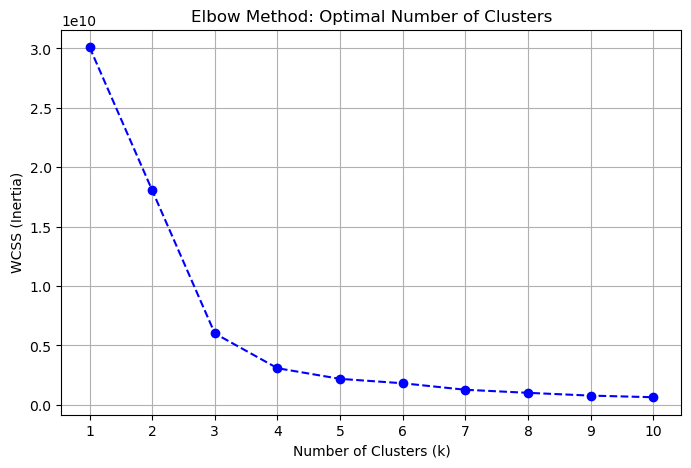

In [84]:
#KMeans using elbow methods
from sklearn.impute import SimpleImputer
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(
    imputer.fit_transform(features_numeric),
    columns=features_numeric.columns,
    index=features_numeric.index
)

# Step 2: Compute WCSS for various k
wcss = []
k_values = range(1, 11)

for k in k_values:
    model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    model.fit(features_imputed)
    wcss.append(model.inertia_)  # WCSS

# Step 3: Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()





In [92]:
# optimal_k determined is 4
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(features_imputed)

# Add labels to your DataFrame
df_preprocessed['Cluster'] = cluster_labels

# Check cluster distribution
print(df_preprocessed['Cluster'].value_counts())



Cluster
0    50564
3       31
2        2
1        2
Name: count, dtype: int64


C:\Users\HP\.conda\envs\Snapdeal\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


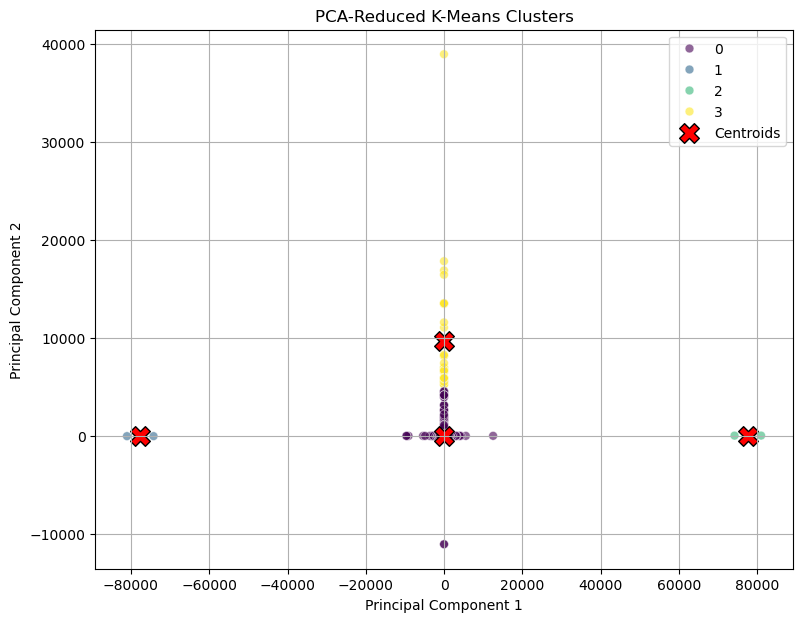

In [98]:
# For Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(features_imputed)

optimal_k = 4  # your chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(features_imputed)
centroids = kmeans.cluster_centers_
centroids_2d = pca.transform(centroids)  # Project centroids into 2D

plt.figure(figsize=(9, 7))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=labels, palette='viridis',
                s=40, alpha=0.6, legend='full')

plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            c='red', marker='X', s=200, edgecolor='black', label='Centroids')

plt.title('PCA-Reduced K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()






In [100]:
# Assign the cluster labels to the original dataset
df_preprocessed['Cluster'] = labels
df_preprocessed.head()


,Quantity,UnitPrice,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country_Austria,Country_Bahrain,...,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,DayOfWeek,IsWeekend,Month,Cluster
0,-0.008077,-0.044565,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,12.0,0
1,-0.008077,-0.046178,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,0.018268,-0.046547,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,-0.008077,-0.040646,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,-0.011117,-0.036728,<NA>,<NA>,<NA>,<NA>,NaT,<NA>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [101]:
# Group the data by cluster
cluster_groups = df_preprocessed.groupby('Cluster')

# Calculate summary statistics
cluster_means = cluster_groups.mean(numeric_only=True)
cluster_medians = cluster_groups.median(numeric_only=True)
cluster_stds = cluster_groups.std(numeric_only=True)

# Display the results
print("Cluster-wise Mean:\n", cluster_means)
print("\nCluster-wise Median:\n", cluster_medians)
print("\nCluster-wise Standard Deviation:\n", cluster_stds)


Cluster-wise Mean:
              Quantity  UnitPrice   Quantity    UnitPrice  Country_Austria  \
Cluster                                                                     
0        9.715211e-07   0.000007  13.990992    10.251952         0.000735   
1                 NaN        NaN   -77605.0         1.56         0.000000   
2                 NaN        NaN    77605.0         1.56         0.000000   
3       -4.192761e-03  -0.031995  -0.806452  9730.436452         0.000000   

         Country_Bahrain  Country_Belgium  Country_Brazil  Country_Canada  \
Cluster                                                                     
0               0.000155         0.004601        0.000039        0.000232   
1               0.000000         0.000000        0.000000        0.000000   
2               0.000000         0.000000        0.000000        0.000000   
3               0.000000         0.000000        0.000000        0.000000   

         Country_Channel Islands  ...  Country_Spain  

C:\Users\HP\AppData\Local\Temp\ipykernel_5628\3611632537.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


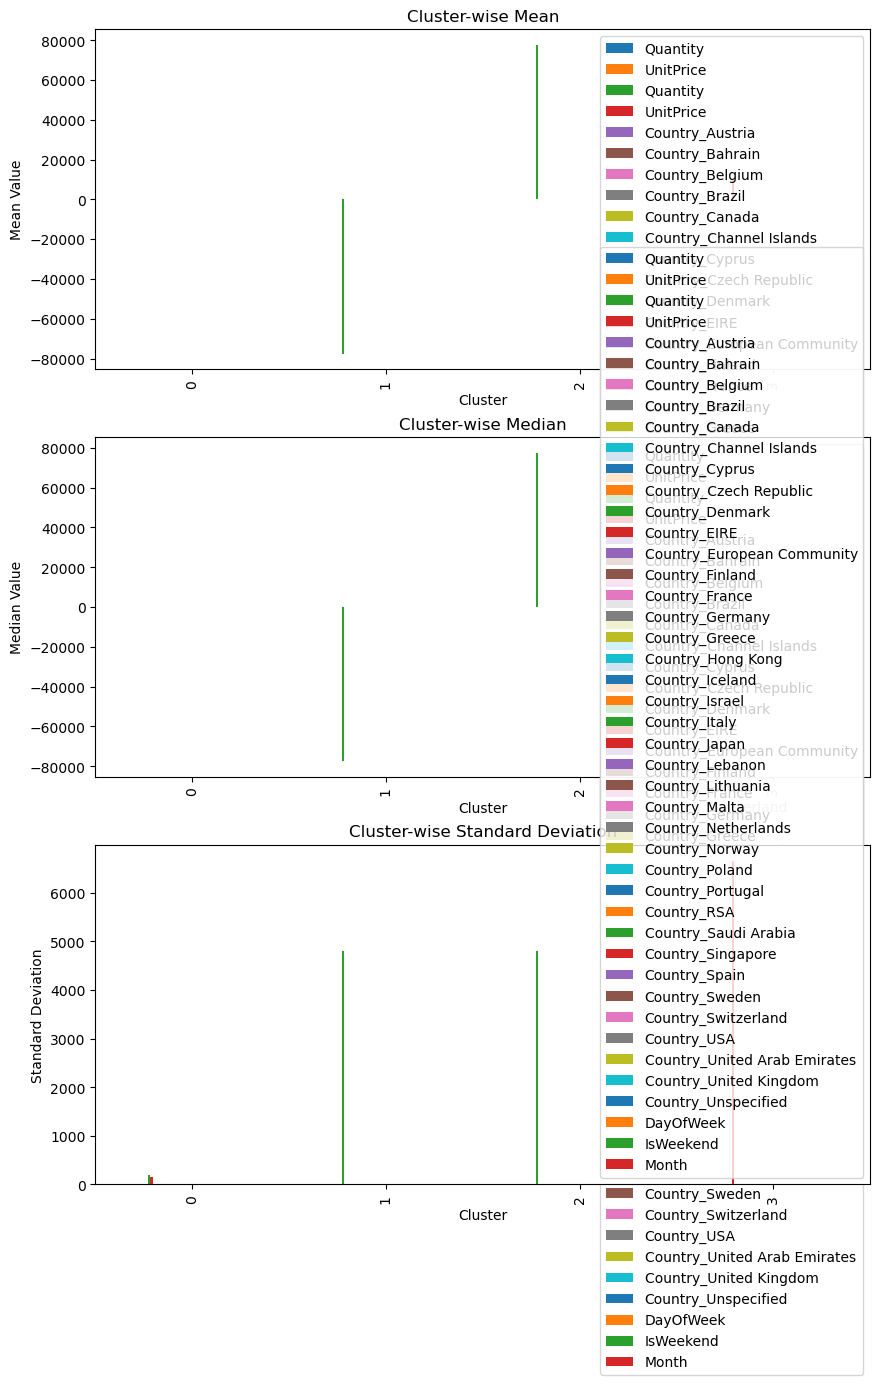

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_preprocessed' contains the customer data with 'Cluster' as a column
cluster_groups = df_preprocessed.groupby('Cluster')

# Calculate summary statistics
cluster_means = cluster_groups.mean(numeric_only=True)
cluster_medians = cluster_groups.median(numeric_only=True)
cluster_stds = cluster_groups.std(numeric_only=True)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Mean Plot
cluster_means.plot(kind='bar', ax=axes[0], title='Cluster-wise Mean')
axes[0].set_ylabel('Mean Value')

# Median Plot
cluster_medians.plot(kind='bar', ax=axes[1], title='Cluster-wise Median')
axes[1].set_ylabel('Median Value')

# Standard Deviation Plot
cluster_stds.plot(kind='bar', ax=axes[2], title='Cluster-wise Standard Deviation')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()
